# Real Estate Website Scraping
    



In [150]:
from lxml import html
import requests
import argparse
import pandas as pd
import numpy as np
import re
from __future__ import division
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

In [282]:
# Below url for newest houses in target areas w/ 3+ beds, 1.5+ baths, $150k-$500k, 2000+ sqft, 1990+ year built, 200- hoa fee
target_zips = ['30022', '30005', '30097', '30309', '30319', '30342', '30328', '30096']

urls = ['https://www.zillow.com/homes/for_sale/{0}/house,townhouse_type/3-_beds/1.5-_baths/150000-500000_price/2000-_lot/1990-_built/0-200_hoa/days_sort'.format(zip) for zip in target_zips]

In [283]:
urls

['https://www.zillow.com/homes/for_sale/30022/house,townhouse_type/3-_beds/1.5-_baths/150000-500000_price/2000-_lot/1990-_built/0-200_hoa/days_sort',
 'https://www.zillow.com/homes/for_sale/30005/house,townhouse_type/3-_beds/1.5-_baths/150000-500000_price/2000-_lot/1990-_built/0-200_hoa/days_sort',
 'https://www.zillow.com/homes/for_sale/30097/house,townhouse_type/3-_beds/1.5-_baths/150000-500000_price/2000-_lot/1990-_built/0-200_hoa/days_sort',
 'https://www.zillow.com/homes/for_sale/30309/house,townhouse_type/3-_beds/1.5-_baths/150000-500000_price/2000-_lot/1990-_built/0-200_hoa/days_sort',
 'https://www.zillow.com/homes/for_sale/30319/house,townhouse_type/3-_beds/1.5-_baths/150000-500000_price/2000-_lot/1990-_built/0-200_hoa/days_sort',
 'https://www.zillow.com/homes/for_sale/30342/house,townhouse_type/3-_beds/1.5-_baths/150000-500000_price/2000-_lot/1990-_built/0-200_hoa/days_sort',
 'https://www.zillow.com/homes/for_sale/30328/house,townhouse_type/3-_beds/1.5-_baths/150000-500000_

In [284]:
headers= {'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
'accept-encoding':'gzip, deflate, sdch, br',
'accept-language':'en-GB,en;q=0.8,en-US;q=0.6,ml;q=0.4',
'cache-control':'max-age=0',
'upgrade-insecure-requests':'1',
'user-agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36'
}

In [285]:
properties_list = []
for url in urls:
    response = requests.get(url, headers=headers)
    parser = html.fromstring(response.text)
    search_results = parser.xpath("//div[@id='search-results']//article") #list of html elemets under search-results/article
    for properties in search_results:
        raw_address = properties.xpath(".//span[@itemprop='address']//span[@itemprop='streetAddress']//text()")
        raw_city = properties.xpath(".//span[@itemprop='address']//span[@itemprop='addressLocality']//text()")
        raw_state= properties.xpath(".//span[@itemprop='address']//span[@itemprop='addressRegion']//text()")
        raw_postal_code= properties.xpath(".//span[@itemprop='address']//span[@itemprop='postalCode']//text()")
        raw_price = properties.xpath(".//span[@class='zsg-photo-card-price']//text()")
        raw_info = properties.xpath(".//span[@class='zsg-photo-card-info']//text()")
        raw_broker_name = properties.xpath(".//span[@class='zsg-photo-card-broker-name']//text()")
        url = properties.xpath(".//a[contains(@class,'overlay-link')]/@href")
        raw_title = properties.xpath(".//h4//text()")

        address = ' '.join(' '.join(raw_address).split()) if raw_address else None
        city = ''.join(raw_city).strip() if raw_city else None
        state = ''.join(raw_state).strip() if raw_state else None
        postal_code = ''.join(raw_postal_code).strip() if raw_postal_code else None
        price = ''.join(raw_price).strip() if raw_price else None
        info = ' '.join(' '.join(raw_info).split()).replace(u"\xb7",',')
        broker = ''.join(raw_broker_name).strip() if raw_broker_name else None
        title = ''.join(raw_title) if raw_title else None
        property_url = "https://www.zillow.com"+url[0] if url else None 
        is_forsale = properties.xpath('.//span[@class="zsg-icon-for-sale"]')
        properties = {
                        'address':address,
                        'city':city,
                        'state':state,
                        'postal_code':postal_code,
                        'price':price,
                        'facts and features':info,
                        'real estate provider':broker,
                        'url':property_url,
                        'title':title
        }
        if is_forsale:
            properties_list.append(properties)

# Result count
print(str(len(properties_list))+' results found')

128 results found


In [286]:
properties_df = pd.DataFrame(properties_list)
properties_df = properties_df[properties_df['postal_code'].isin(target_zips)]

In [287]:
properties_df

,address,city,facts and features,postal_code,price,real estate provider,state,title,url
0,4390 Pinewalk Dr,Alpharetta,"4 bds , 3 ba , 2,713 sqft",30022,"$334,900",SOLID SOURCE REALTY INC.,GA,House For Sale,https://www.zillow.com/homedetails/4390-Pinewa...
1,5045 Saddle Bridge Ln,Alpharetta,"3 bds , 2 ba , 2,694 sqft",30022,"$299,900",None,GA,House For Sale,https://www.zillow.com/homedetails/5045-Saddle...
2,5055 Cinnabar Dr,Alpharetta,"4 bds , 3 ba , 2,920 sqft",30022,"$379,900",None,GA,House For Sale,https://www.zillow.com/homedetails/5055-Cinnab...
3,10890 Bossier Dr,Alpharetta,"3 bds , 3.5 ba , 2,785 sqft",30022,"$425,000",None,GA,House For Sale,https://www.zillow.com/homedetails/10890-Bossi...
4,130 Brassy Ct,Alpharetta,"3 bds , 4 ba , 2,610 sqft",30022,"$398,500",None,GA,Coming Soon,https://www.zillow.com/homedetails/130-Brassy-...
5,350 Riversong Way,Alpharetta,"3 bds , 3 ba , 2,021 sqft",30022,"$299,900",RE/MAX Town & Country,GA,House For Sale,https://www.zillow.com/homedetails/350-Riverso...
6,10997 Waters Rd,Alpharetta,"3 bds , 3 ba , 3,422 sqft",30022,"$475,000",None,GA,House For Sale,https://www.zillow.com/homedetails/10997-Water...
7,750 Gates Ln,Alpharetta,"5 bds , 4 ba , 2,095 sqft",30022,"$389,500",RE/MAX Town and Country,GA,House For Sale,https://www.zillow.com/homedetails/750-Gates-L...
8,750 Gates Ln # 39,Alpharetta,"5 bds , 4 ba , 2,095 sqft",30022,"$389,500",RE/MAX Town & Country,GA,House For Sale,https://www.zillow.com/homedetails/750-Gates-L...
9,360 Cotton Ct,Alpharetta,"4 bds , 3 ba , 1,825 sqft",30022,"$279,900",None,GA,House For Sale,https://www.zillow.com/homedetails/360-Cotton-...


In [288]:
#parse price to numeric
properties_df['price'] = properties_df['price'].apply(lambda x : float(re.sub('\D','',x)))

In [289]:
properties_df

,address,city,facts and features,postal_code,price,real estate provider,state,title,url
0,4390 Pinewalk Dr,Alpharetta,"4 bds , 3 ba , 2,713 sqft",30022,334900.0,SOLID SOURCE REALTY INC.,GA,House For Sale,https://www.zillow.com/homedetails/4390-Pinewa...
1,5045 Saddle Bridge Ln,Alpharetta,"3 bds , 2 ba , 2,694 sqft",30022,299900.0,None,GA,House For Sale,https://www.zillow.com/homedetails/5045-Saddle...
2,5055 Cinnabar Dr,Alpharetta,"4 bds , 3 ba , 2,920 sqft",30022,379900.0,None,GA,House For Sale,https://www.zillow.com/homedetails/5055-Cinnab...
3,10890 Bossier Dr,Alpharetta,"3 bds , 3.5 ba , 2,785 sqft",30022,425000.0,None,GA,House For Sale,https://www.zillow.com/homedetails/10890-Bossi...
4,130 Brassy Ct,Alpharetta,"3 bds , 4 ba , 2,610 sqft",30022,398500.0,None,GA,Coming Soon,https://www.zillow.com/homedetails/130-Brassy-...
5,350 Riversong Way,Alpharetta,"3 bds , 3 ba , 2,021 sqft",30022,299900.0,RE/MAX Town & Country,GA,House For Sale,https://www.zillow.com/homedetails/350-Riverso...
6,10997 Waters Rd,Alpharetta,"3 bds , 3 ba , 3,422 sqft",30022,475000.0,None,GA,House For Sale,https://www.zillow.com/homedetails/10997-Water...
7,750 Gates Ln,Alpharetta,"5 bds , 4 ba , 2,095 sqft",30022,389500.0,RE/MAX Town and Country,GA,House For Sale,https://www.zillow.com/homedetails/750-Gates-L...
8,750 Gates Ln # 39,Alpharetta,"5 bds , 4 ba , 2,095 sqft",30022,389500.0,RE/MAX Town & Country,GA,House For Sale,https://www.zillow.com/homedetails/750-Gates-L...
9,360 Cotton Ct,Alpharetta,"4 bds , 3 ba , 1,825 sqft",30022,279900.0,None,GA,House For Sale,https://www.zillow.com/homedetails/360-Cotton-...


In [290]:
# parse facts and features
properties_df['beds'] = properties_df['facts and features'].apply(lambda x : 
                                                                  re.split('bds|ba|sqft',re.sub(r'[^a-zA-Z0-9]', '',x))[0])
properties_df['baths'] = properties_df['facts and features'].apply(lambda x : 
                                                                  re.split('bds|ba|sqft',re.sub(r'[^a-zA-Z0-9]', '',x))[1])
properties_df['area'] = properties_df['facts and features'].apply(lambda x : 
                                                                  re.split('bds|ba|sqft',re.sub(r'[^a-zA-Z0-9]', '',x))[2])

In [291]:
properties_df.replace('',np.nan,inplace=True)

In [292]:
# Unit Price
properties_df['unit_price'] =  properties_df['price'] / properties_df['area'].astype(float)

In [293]:
properties_df

,address,city,facts and features,postal_code,price,real estate provider,state,title,url,beds,baths,area,unit_price
0,4390 Pinewalk Dr,Alpharetta,"4 bds , 3 ba , 2,713 sqft",30022,334900.0,SOLID SOURCE REALTY INC.,GA,House For Sale,https://www.zillow.com/homedetails/4390-Pinewa...,4,3,2713,123.442683
1,5045 Saddle Bridge Ln,Alpharetta,"3 bds , 2 ba , 2,694 sqft",30022,299900.0,None,GA,House For Sale,https://www.zillow.com/homedetails/5045-Saddle...,3,2,2694,111.321455
2,5055 Cinnabar Dr,Alpharetta,"4 bds , 3 ba , 2,920 sqft",30022,379900.0,None,GA,House For Sale,https://www.zillow.com/homedetails/5055-Cinnab...,4,3,2920,130.102740
3,10890 Bossier Dr,Alpharetta,"3 bds , 3.5 ba , 2,785 sqft",30022,425000.0,None,GA,House For Sale,https://www.zillow.com/homedetails/10890-Bossi...,3,35,2785,152.603232
4,130 Brassy Ct,Alpharetta,"3 bds , 4 ba , 2,610 sqft",30022,398500.0,None,GA,Coming Soon,https://www.zillow.com/homedetails/130-Brassy-...,3,4,2610,152.681992
5,350 Riversong Way,Alpharetta,"3 bds , 3 ba , 2,021 sqft",30022,299900.0,RE/MAX Town & Country,GA,House For Sale,https://www.zillow.com/homedetails/350-Riverso...,3,3,2021,148.391885
6,10997 Waters Rd,Alpharetta,"3 bds , 3 ba , 3,422 sqft",30022,475000.0,None,GA,House For Sale,https://www.zillow.com/homedetails/10997-Water...,3,3,3422,138.807715
7,750 Gates Ln,Alpharetta,"5 bds , 4 ba , 2,095 sqft",30022,389500.0,RE/MAX Town and Country,GA,House For Sale,https://www.zillow.com/homedetails/750-Gates-L...,5,4,2095,185.918854
8,750 Gates Ln # 39,Alpharetta,"5 bds , 4 ba , 2,095 sqft",30022,389500.0,RE/MAX Town & Country,GA,House For Sale,https://www.zillow.com/homedetails/750-Gates-L...,5,4,2095,185.918854
9,360 Cotton Ct,Alpharetta,"4 bds , 3 ba , 1,825 sqft",30022,279900.0,None,GA,House For Sale,https://www.zillow.com/homedetails/360-Cotton-...,4,3,1825,153.369863


In [294]:
# Count nan values
pd.isnull(properties_df.unit_price).value_counts()

False    109
True       6
Name: unit_price, dtype: int64

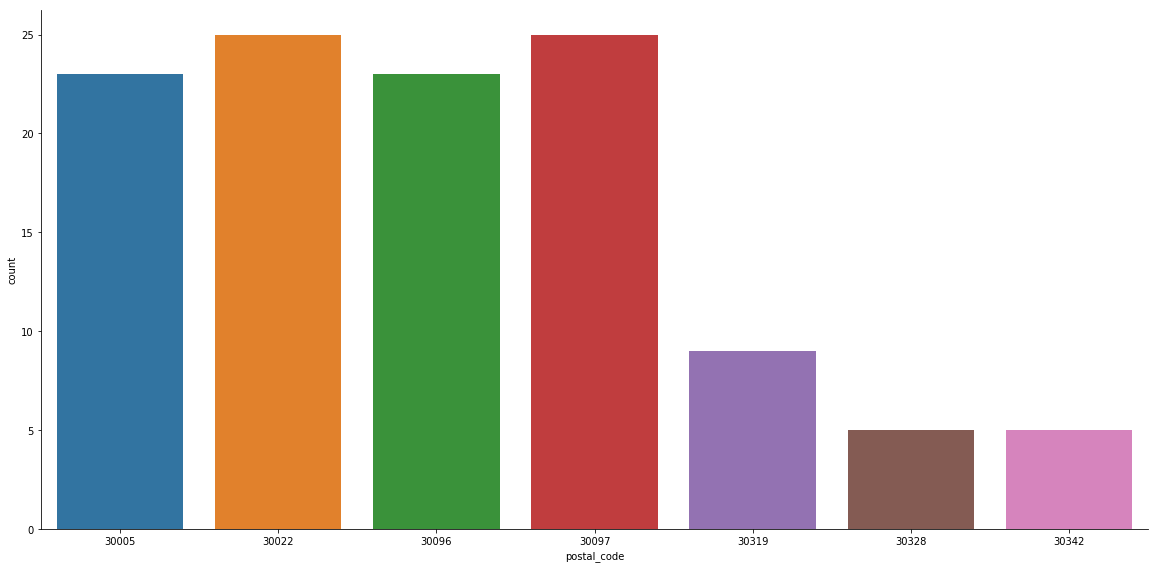

In [295]:
# count by zip
sns.factorplot('postal_code', kind='count', data=properties_df, size=8, aspect = 2)

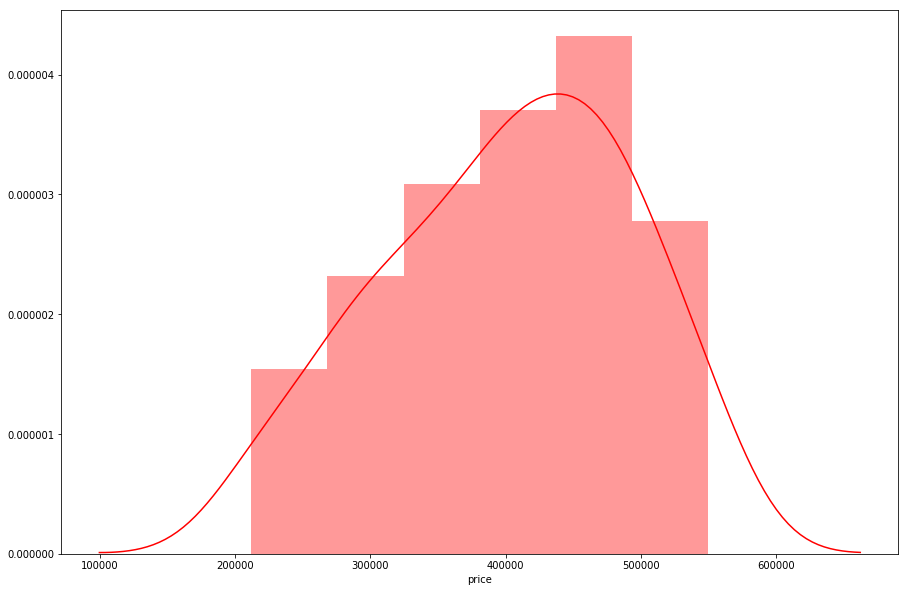

In [298]:
# price histogram
fig1, ax1 = plt.subplots()
fig1.set_size_inches(15, 10)
ax1.grid(False)
sns.distplot(properties_df.price, color='r')

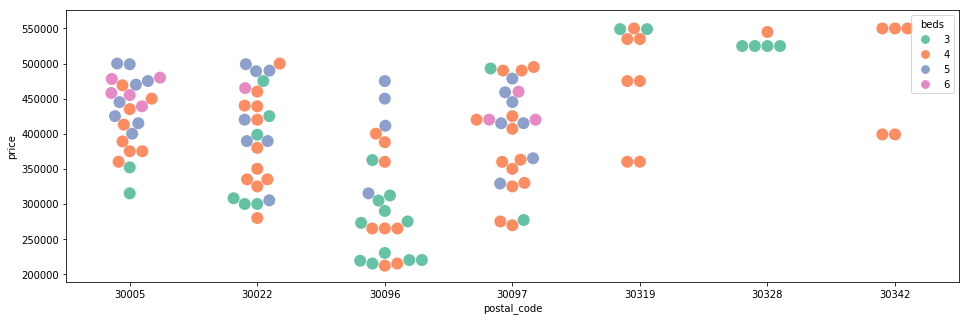

In [301]:
fig2, ax2 = plt.subplots()
fig2.set_size_inches(16, 5)
sns.swarmplot(x='postal_code', y='price', hue='beds', data=properties_df, ax=ax2, size=12, palette='Set2')

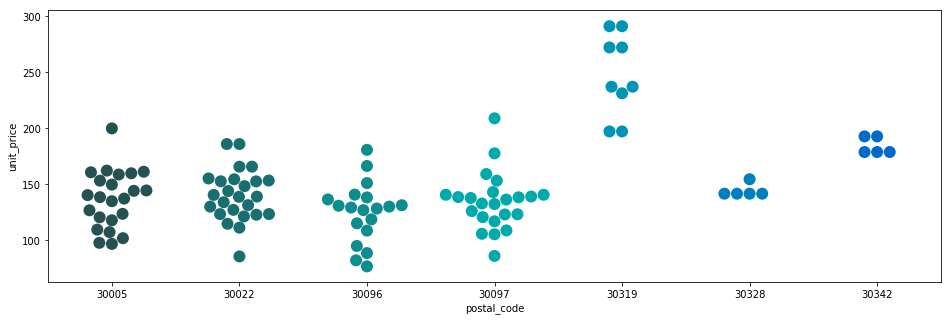

In [303]:
# Unit price & zip(area)
fig3, ax3 = plt.subplots()
fig3.set_size_inches(16, 5)
sns.swarmplot(x='postal_code', y='unit_price', data=properties_df, ax=ax3, size=12, palette='winter_d')

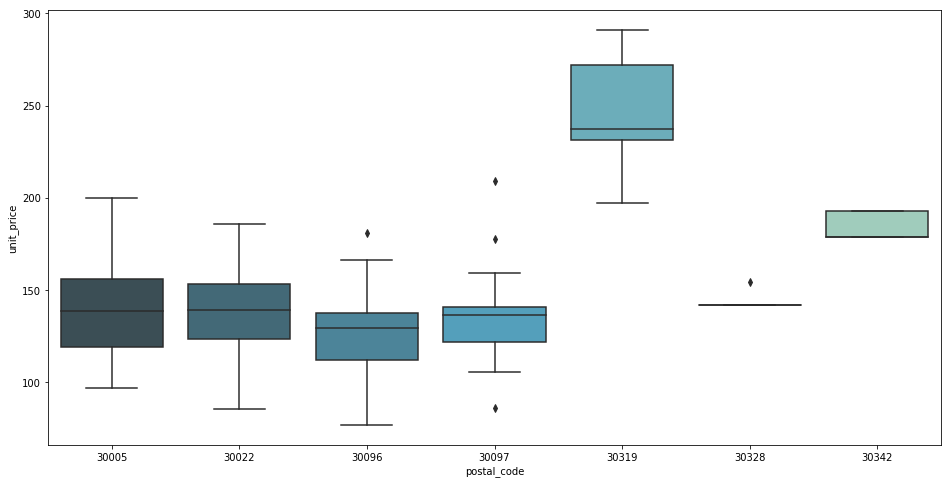

In [309]:
# Unit price & zip(area)
fig4, ax4 = plt.subplots()
fig4.set_size_inches(16, 8)
sns.boxplot(x='postal_code', y='unit_price', data=properties_df, ax=ax4, palette='GnBu_d')